In [ ]:
#Bike Sharing Demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 지지플랏
plt.style.use('ggplot')



In [3]:
train = pd.read_csv("train.csv", parse_dates =["datetime"])
train.shape

(10886, 12)

In [4]:
test = pd.read_csv("test.csv", parse_dates =["datetime"])
test.shape

(6493, 9)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#temp => 기온을 살펴보자.
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [8]:
# 널 데이터가 있는지를 체크하기 !!
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

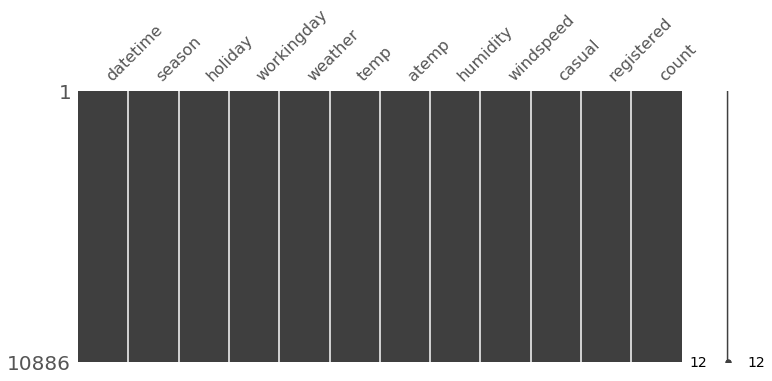

In [9]:
#널 테이터가 있는지 시각화 해주는 툴!! 
import missingno as msno
msno.matrix(train, figsize =(12,5))


In [13]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [14]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

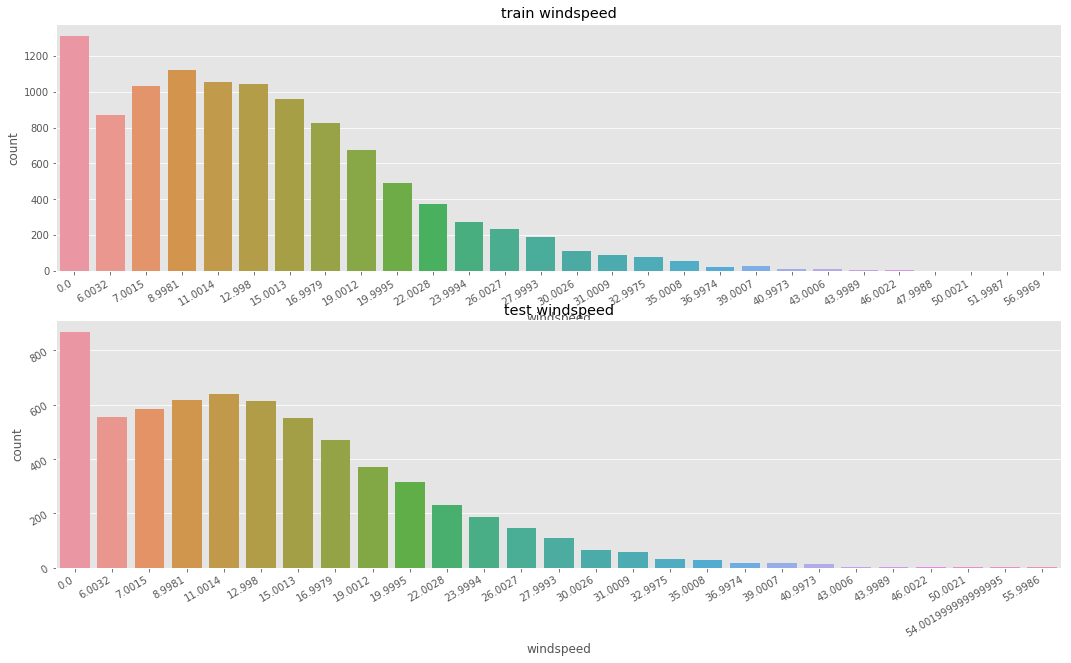

In [15]:
#3/4
#windspeed 풍속 0 값이 많음!! 고치자!!
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0]) #지정된 매트리스에 플랏을 그라자
plt.xticks(rotation=30, ha="right")
axes[0].set(ylabel ="Count", title ="train windspeed")
sns.countplot(data=train, x="windspeed", ax =axes[0])

plt.sca(axes[1]) 
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=30, ha="right")
axes[1].set(ylabel="Count", title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1]) # count해서 plot 하기


In [16]:
# 풍속 0에 특정값 넣기
# 머신러닝으로 예측을 해서 풍속값 넣기
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data['windspeed'] == 0] #loc를 쓰면 조건값을 만족시키는 것들을 리턴시켜줌
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    wCol = ['season', 'weather', 'humidity', 'month', 'temp','year', 'atemp']
    
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    rfModel_wind = RandomForestClassifier()
    
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])
    
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wind0Values
    
    data = predictWindNot0.append(predictWind0)
    
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True) # inplace : do not create new a new object (false)
    data.drop('index', inplace=True, axis =1)
  
    return data
    

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


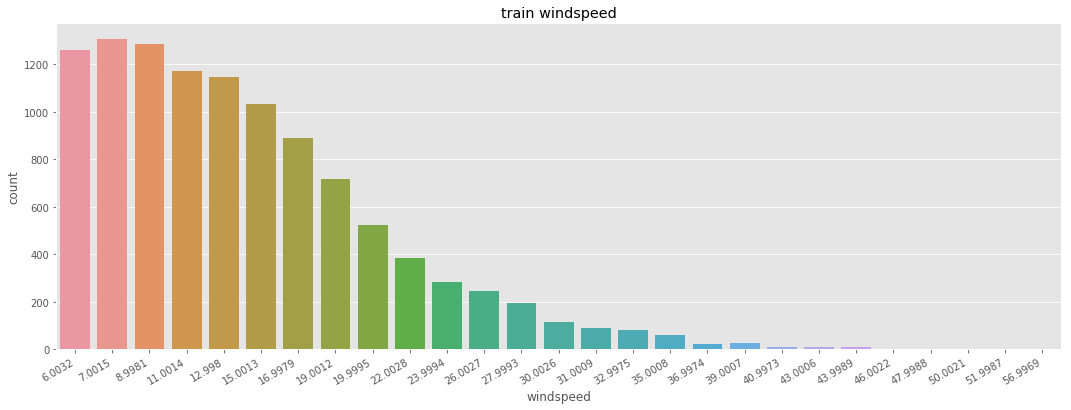

In [17]:
#0 값을 조정 윈드스피드

train1 = predict_windspeed(train)

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)


plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel="Count", title='train windspeed')
sns.countplot(data=train1, x='windspeed', ax =ax1)


In [29]:
#연속형 feature와 범주형 feature
#범주형 feature의 type을 category로 변경해 줌

categorical_feature_names = ['season', 'holiday', 'workingday', 'weather', 
                             'dayofweek', 'month', 'year', 'hour']

for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')
    

In [30]:
#feature selection
feature_names = ['season', 'weather', 'temp','atemp', 'humidity', 'windspeed',
                'year', 'hour','dayofweek', 'holiday', 'workingday']
feature_names


['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [31]:
x_train = train[feature_names]
print(x_train.shape)


(10886, 11)


In [32]:
x_test = test[feature_names]
x_test.shape

(6493, 11)

In [33]:
label_name ='count'
y_train = train[label_name]
y_train.shape 

(10886,)

In [45]:
# Evaluation Model
# RMSLE root mean squared log error 과소평관된 항목에 패널티를 준다.

from sklearn.metrics import make_scorer

def rmsle(pre_val, act_val):
    pre_val = np.array(pre_val)
    act_val = np.array(act_val)
    
    log_pre = np.log(pre_val +1)
    log_act = np.log(act_val +1)
    
    diff = np.square(log_pre - log_act)
    mean_diff = diff.mean()
    
    score = np.sqrt(mean_diff)
    return score


In [46]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer(train['count'], y_train)

TypeError: __call__() missing 1 required positional argument: 'y_true'

In [35]:
# cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [12]:
#RandomForest

NameError: name 'RandomForest' is not defined

In [36]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators = 100, n_jobs=1, random_state=0)

model


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
%time score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)

score = score.mean()

print("Score = {0:.5f}".format(score))



CPU times: user 26.4 s, sys: 670 ms, total: 27.1 s
Wall time: 27.3 s
Score = 0.33084


In [38]:
# 학습
model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
#prediction

prediction = model.predict(x_test)
prediction.shape


(6493,)

[Text(0.5,1,'test')]

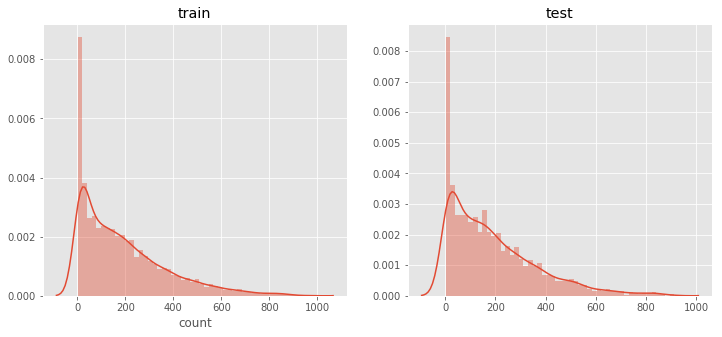

In [40]:
# visualization
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title="train")

sns.distplot(prediction, ax=ax2, bins=50)
ax2.set(title="test")



In [47]:
# regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None #?? What? 
warnings.filterwarnings('ignore', category= DeprecationWarning) # What does it mean?

# regression / Save it
lModel = LinearRegression()

# fit it

y_train_log = np.log1p(y_train) # log 1(one)p
lModel.fit(x_train, y_train_log)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# prediction with regression

preds = lModel.predict(x_train)
print("RMSLE Value For Linear Regression: ", rmsle(np.exp(y_train_log), np.exp(preds))) 

RMSLE Value For Linear Regression:  0.9796533446288508


In [54]:
# Ridge

# Ridge Save it!!
ridge_m = Ridge()

ridge_params = { 'max_iter' : [3000], 'alpha' : [0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800]}


rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV(ridge_m, ridge_params, scoring = rmsle_scorer, cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit(x_train, y_train_log)
preds = grid_ridge_m.predict(x_train)
print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log), np.exp(preds)))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9796533426169097


0.999896315728952

In [41]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

submission["count"] = prediction
submission.shape
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.480000
1,2011-01-20 01:00:00,4.650000
2,2011-01-20 02:00:00,4.183333
3,2011-01-20 03:00:00,3.710000
4,2011-01-20 04:00:00,3.210000


In [45]:
submission.to_csv("Score_{0:.5f}_submission.csv".format(score), index=False) #index??



In [47]:
# rate
430/3501

0.1228220508426164

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0,0.5,'Count'), Text(0.5,1,'Amount of rents')]

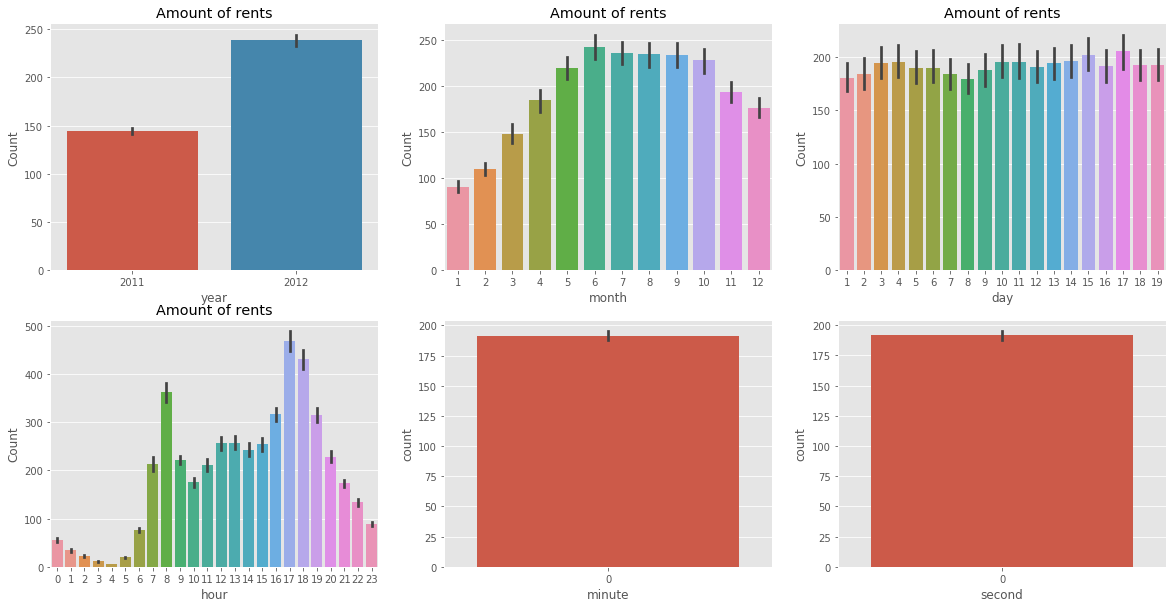

In [31]:
figure, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols =3)
figure.set_size_inches(20,10)


sns.barplot(data=train, x = "year", y="count", ax = ax1)
sns.barplot(data=train, x = "month", y="count", ax = ax2)
sns.barplot(data=train, x = "day", y="count", ax = ax3)
sns.barplot(data=train, x = "hour", y="count", ax = ax4)
sns.barplot(data=train, x = "minute", y="count", ax = ax5)
sns.barplot(data=train, x = "second", y="count", ax = ax6)

ax1.set(ylabel = "Count", title ="Amount of rents")
ax2.set(ylabel = "Count", title ="Amount of rents")
ax3.set(ylabel = "Count", title ="Amount of rents")
ax4.set(ylabel = "Count", title ="Amount of rents")



[Text(0,0.5,'Count'), Text(0.5,1,'Amount of rents')]

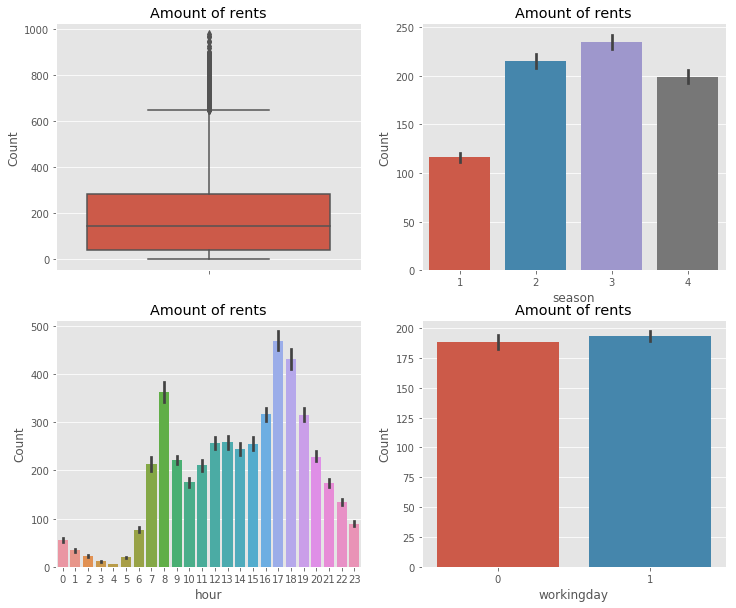

In [36]:
fig, axes = plt.subplots(nrows=2, ncols =2)
fig.set_size_inches(12,10)

# orient?

sns.boxplot(data=train, y="count",orient ="v", ax = axes[0][0])
sns.barplot(data=train, x = "season", y="count", orient ="v", ax = axes[0][1])
sns.barplot(data=train, x = "hour", y="count", orient ="v", ax = axes[1][0])
sns.barplot(data=train, x = "workingday", y="count", orient ="v", ax = axes[1][1])

axes[0][0].set(ylabel = "Count", title ="Amount of rents")
axes[0][1].set(ylabel = "Count", title ="Amount of rents")
axes[1][0].set(ylabel = "Count", title ="Amount of rents")
axes[1][1].set(ylabel = "Count", title ="Amount of rents")



In [37]:

train.shape

(10886, 19)

In [38]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

[Text(0,0.5,'Count'), Text(0.5,1,'season')]

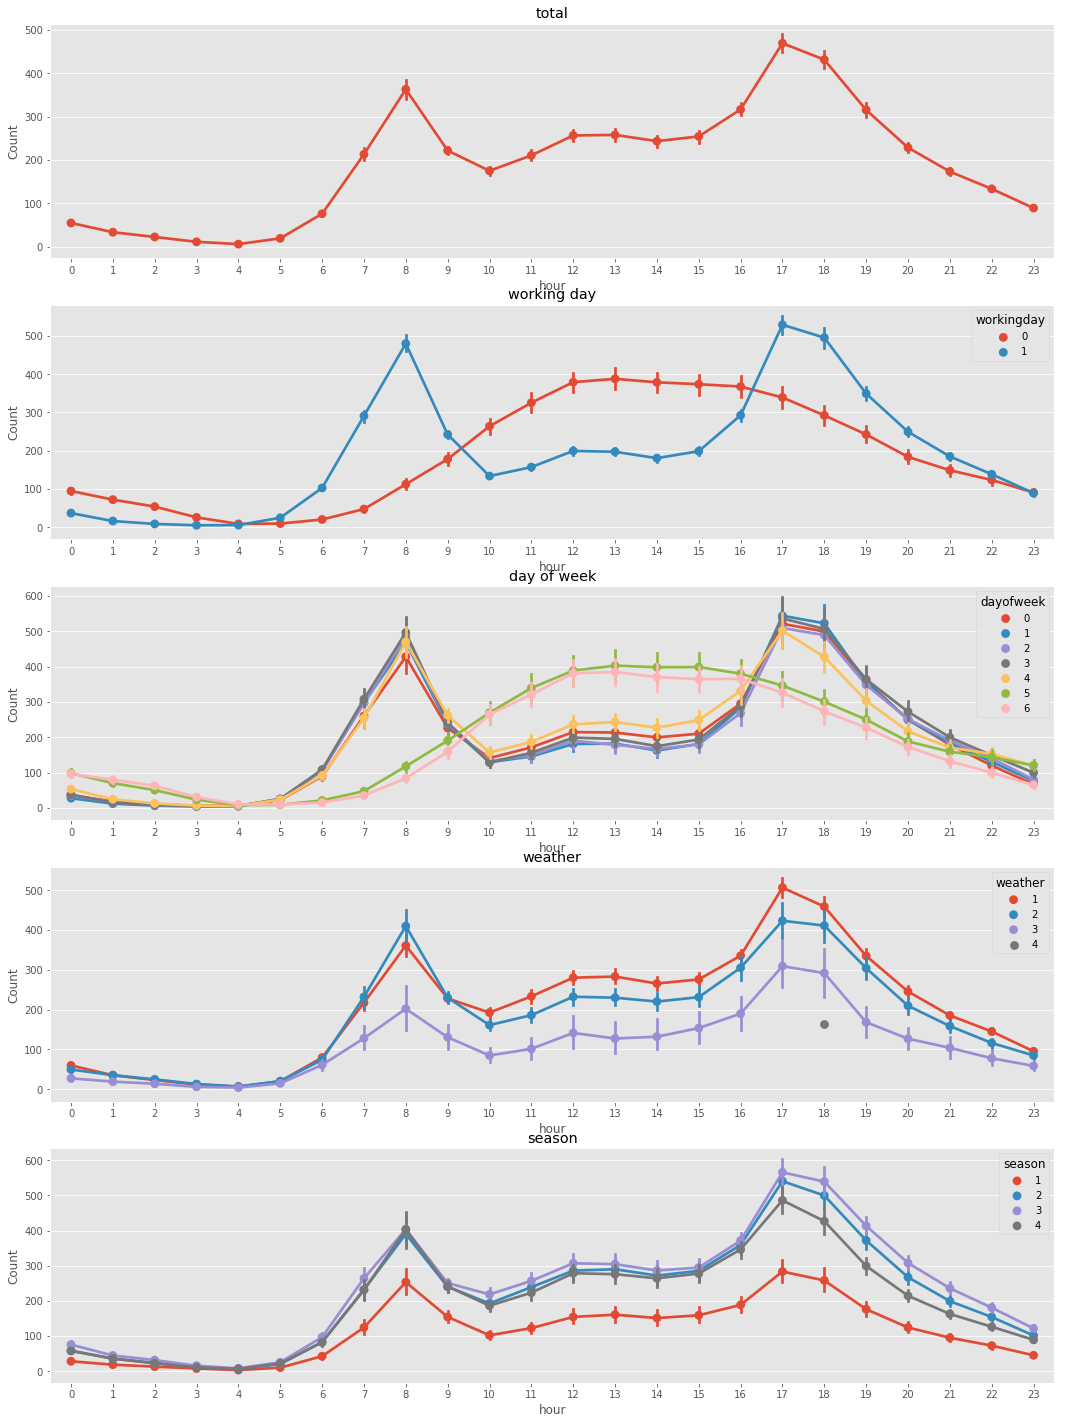

In [39]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

# orient?

sns.pointplot(data=train, x="hour", y="count", ax = ax1)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax = ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek",ax = ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather",ax = ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season",ax = ax5)




ax1.set(ylabel = "Count", title ="total")
ax2.set(ylabel = "Count", title ="working day")
ax3.set(ylabel = "Count", title ="day of week")
ax4.set(ylabel = "Count", title ="weather")
ax5.set(ylabel = "Count", title ="season")




In [47]:
#correaltion matrix = corrMatt
# 각각의 관계를 살펴보기!! 
corrMatt = train[["temp", 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False #??? what is doing here? 같은 거를 폴스로 바꿈 폴스 =0

print(mask)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  
[[ 0.          0.98494811  0.46709706  0.31857128 -0.06494877 -0.01785201
   0.39445364]
 [ 0.          0.          0.46206654  0.31463539 -0.04353571 -0.057473
   0.38978444]
 [ 0.          0.      

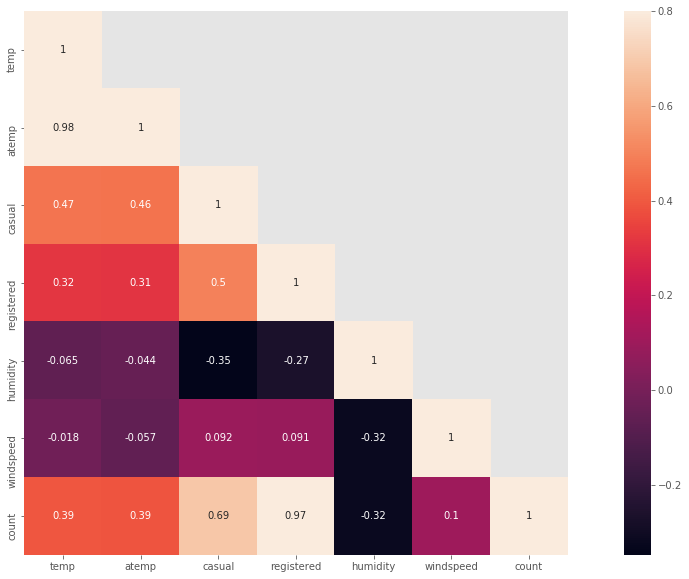

In [50]:
# correlation matrix 그리고 싶을 떄 힛트맵!!

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=0.8, square=True, annot=True)
# 위에서 mask를 반쪽의 대칭행렬로 만들었기때문에 반쪽만 보임.
# registered = 등록된 사람
# casual = 등록되지 않은 사람
# atemp 체감온도



[Text(0,0.5,'Count'), Text(0.5,1,'temp')]

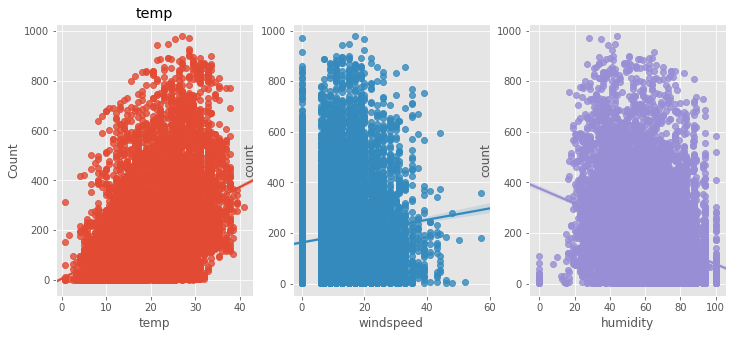

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3)
fig.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)
ax1.set(ylabel = "Count", title ="temp")

In [53]:
#월별 데이터 모으기

def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)
#년도에 따른 월별데이터 모이기

print(train.shape)
train[["datetime", "year_month"]].head()


(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


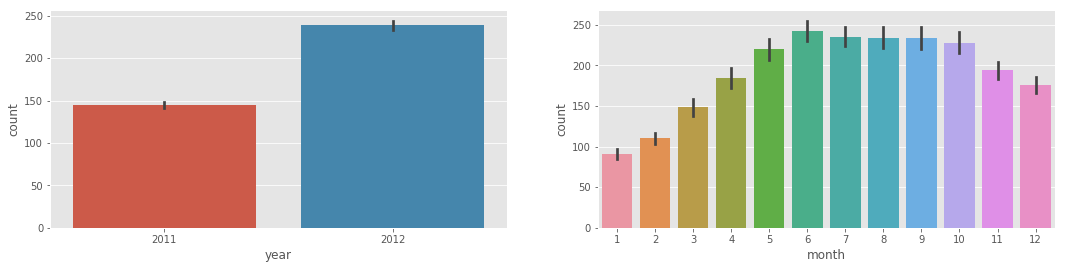

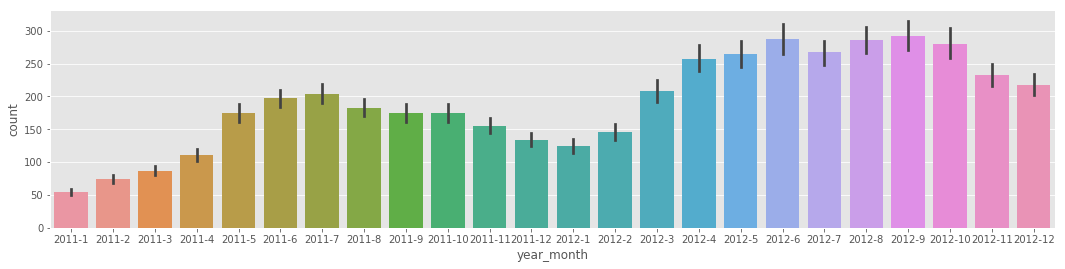

In [56]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2)
fig.set_size_inches(18,4)


sns.barplot(data=train, x = "year", y="count", ax = ax1)
sns.barplot(data=train, x = "month", y="count", ax = ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=train, x = "year_month", y="count", ax = ax3)


In [75]:
# train Without Outliers / 다양한 방법으로 제거 가능 
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= 100*train["count"]]
print(train.shape)
print(trainWithoutOutliers.shape)
train["count"].mean()

(10886, 20)
(10781, 20)


191.57413191254824

((array([-3.82915755, -3.60503354, -3.48203541, ...,  3.48203541,
          3.60503354,  3.82915755]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87523209, 6.87729607,
         6.88448665])),
 (1.3690138954284619, 4.596900109647291, 0.9594009537691354))

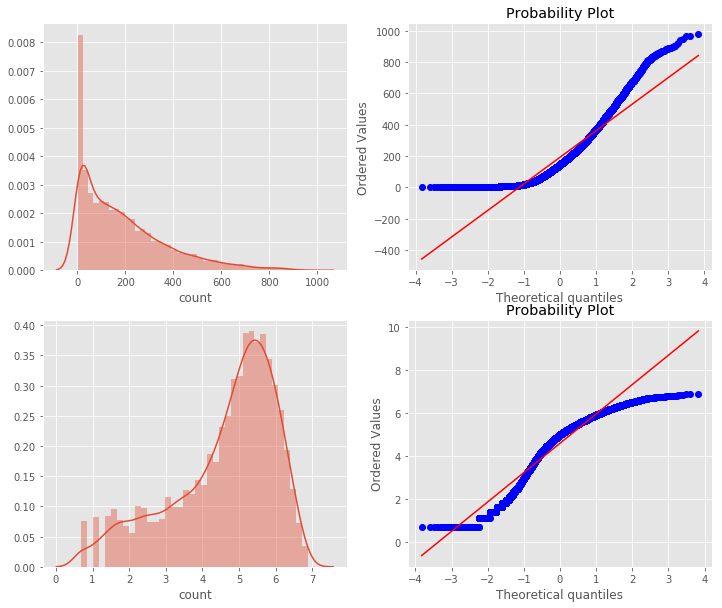

In [79]:
# count 값의 데이터 분포도를 파악하기!!
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)

sns.distplot(train["count"], ax=ax1)
stats.probplot(train["count"], dist="norm", fit=True, plot=ax2)
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=ax3)
stats.probplot(np.log(trainWithoutOutliers["count"]), dist="norm", fit=True, plot=ax4)